# Time Series Analysis on Pune precipitation 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.arima_model import ARMA
import itertools
import math
from statsmodels.tsa.stattools import adfuller

C:\Users\Sachin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
filename = 'pune_1965_to_2002.csv'
rainfall_df=pd.read_csv(filename,delimiter='\t')

In [3]:
rainfall_df.shape

(38, 13)

In [4]:
rainfall_df.set_index('Year',inplace=True)

In [5]:
rainfall_df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


In [6]:
rainfall_df_transpose=rainfall_df.transpose()
rainfall_df_transpose.head()

Year,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
Jan,0.029,0.905,0.248,0.318,0.248,0.070,0.000,0.000,0.000,0.000,...,0.000,0.879,0.695,0.016,1.284,0.008,0.000,0.000,0.147,0.231
Feb,0.069,0.000,3.390,3.035,2.524,0.000,0.000,0.029,2.969,0.000,...,0.078,0.325,0.000,2.779,0.000,2.671,1.431,0.170,0.000,0.911
Mar,0.000,0.000,1.320,1.704,0.334,0.001,0.000,0.000,0.234,6.427,...,1.211,2.415,1.770,0.087,0.747,0.073,0.000,0.000,2.178,0.388
Apr,21.667,2.981,13.482,23.307,4.569,16.218,0.812,5.982,3.925,16.864,...,2.062,16.823,25.949,6.318,23.912,0.377,0.642,1.193,1.528,53.266
May,17.859,63.008,11.116,7.441,6.213,68.036,57.691,19.101,14.978,51.209,...,3.248,33.378,23.964,5.134,4.664,15.717,35.828,26.237,7.860,18.430


Text(0.5,1,'Precipitation across all years')

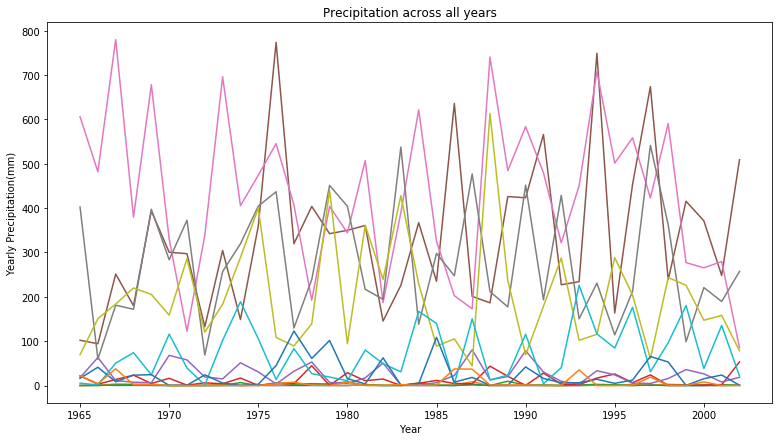

In [7]:
plt.figure(figsize=(13,7))
plt.plot(rainfall_df)
plt.xlabel('Year')
plt.ylabel('Yearly Precipitation(mm)')
plt.title('Precipitation across all years')

In [8]:
rainfall_df_transpose=rainfall_df.transpose()
rainfall_df_transpose.head()

Year,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
Jan,0.029,0.905,0.248,0.318,0.248,0.070,0.000,0.000,0.000,0.000,...,0.000,0.879,0.695,0.016,1.284,0.008,0.000,0.000,0.147,0.231
Feb,0.069,0.000,3.390,3.035,2.524,0.000,0.000,0.029,2.969,0.000,...,0.078,0.325,0.000,2.779,0.000,2.671,1.431,0.170,0.000,0.911
Mar,0.000,0.000,1.320,1.704,0.334,0.001,0.000,0.000,0.234,6.427,...,1.211,2.415,1.770,0.087,0.747,0.073,0.000,0.000,2.178,0.388
Apr,21.667,2.981,13.482,23.307,4.569,16.218,0.812,5.982,3.925,16.864,...,2.062,16.823,25.949,6.318,23.912,0.377,0.642,1.193,1.528,53.266
May,17.859,63.008,11.116,7.441,6.213,68.036,57.691,19.101,14.978,51.209,...,3.248,33.378,23.964,5.134,4.664,15.717,35.828,26.237,7.860,18.430


Text(0.5,1,'Precipitation across all months')

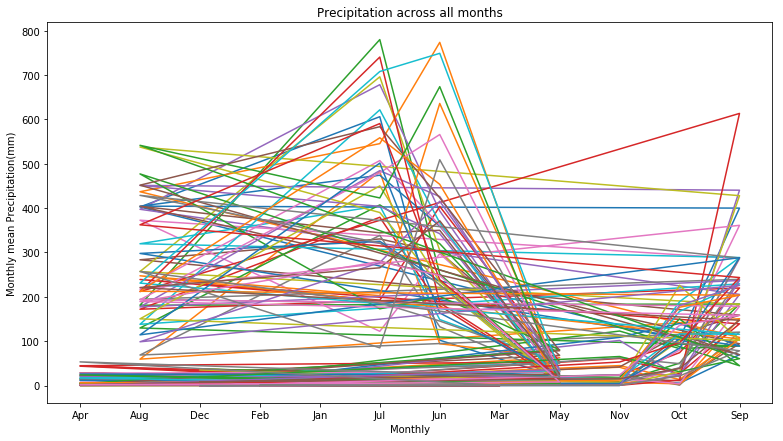

In [9]:
plt.figure(figsize=(13,7))
plt.plot(rainfall_df_transpose)
plt.xlabel('Monthly')
plt.ylabel('Monthly mean Precipitation(mm)')
plt.title('Precipitation across all months')

Text(0.5,1,'Month vs Precipitation across all years')

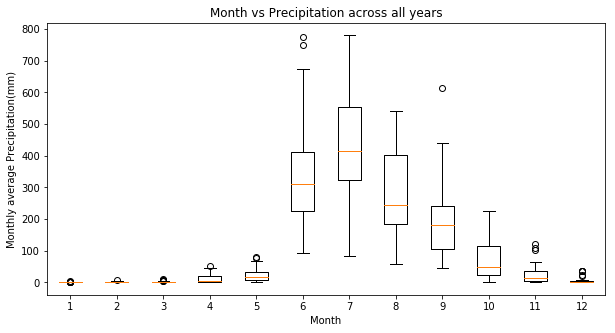

In [10]:
plt.figure(figsize=(10,5))
plt.boxplot(rainfall_df_transpose)
plt.xlabel('Month')
plt.ylabel('Monthly average Precipitation(mm)')
plt.title('Month vs Precipitation across all years')

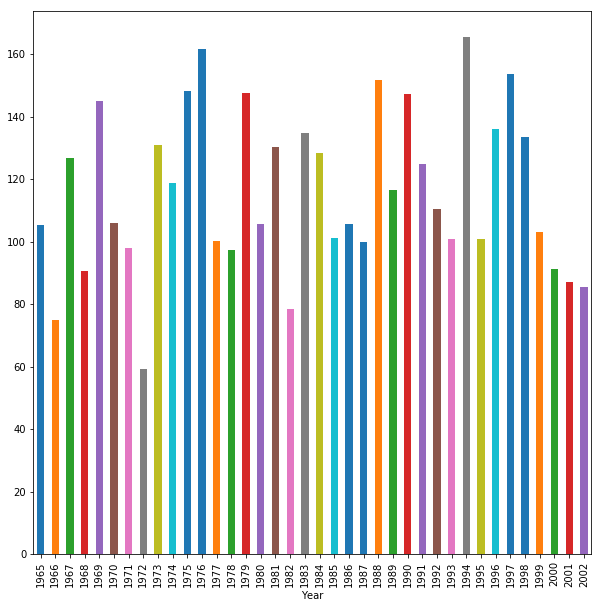

In [11]:
rainfall_df.mean(axis='columns').plot(kind='bar',figsize=(10,10))

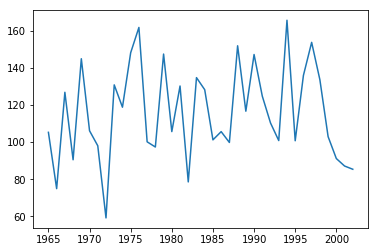

In [12]:
plt.plot(rainfall_df.mean(axis='columns'))

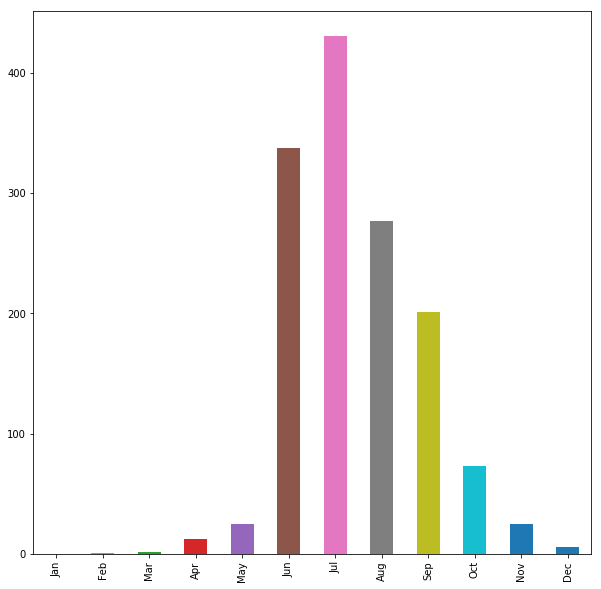

In [13]:
rainfall_df.mean(axis='rows').plot(kind='bar',figsize=(10,10))

In [14]:
dates = pd.date_range(start='1965-01', freq='MS', periods=len(rainfall_df_transpose.columns)*12)
dates

DatetimeIndex(['1965-01-01', '1965-02-01', '1965-03-01', '1965-04-01',
               '1965-05-01', '1965-06-01', '1965-07-01', '1965-08-01',
               '1965-09-01', '1965-10-01',
               ...
               '2002-03-01', '2002-04-01', '2002-05-01', '2002-06-01',
               '2002-07-01', '2002-08-01', '2002-09-01', '2002-10-01',
               '2002-11-01', '2002-12-01'],
              dtype='datetime64[ns]', length=456, freq='MS')

In [15]:
rainfall_df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


In [16]:
rainfall_df_matrix=rainfall_df.as_matrix()
shape = rainfall_df.shape
rainfall_df_matrix = rainfall_df_matrix.reshape((shape[0] * shape[1], 1))
rainfall_df_matrix.shape

(456, 1)

In [17]:
rainfall_data=pd.DataFrame({'Precipitation':rainfall_df_matrix[:,0]})
rainfall_data.set_axis(dates,inplace=True)

In [18]:
rainfall_data

,Precipitation
1965-01-01,0.029
1965-02-01,0.069
1965-03-01,0.000
1965-04-01,21.667
1965-05-01,17.859
1965-06-01,102.111
1965-07-01,606.071
1965-08-01,402.521
1965-09-01,69.511
1965-10-01,5.249


Text(0.5,1,'Monthly mean Precipitation(mm) across years')

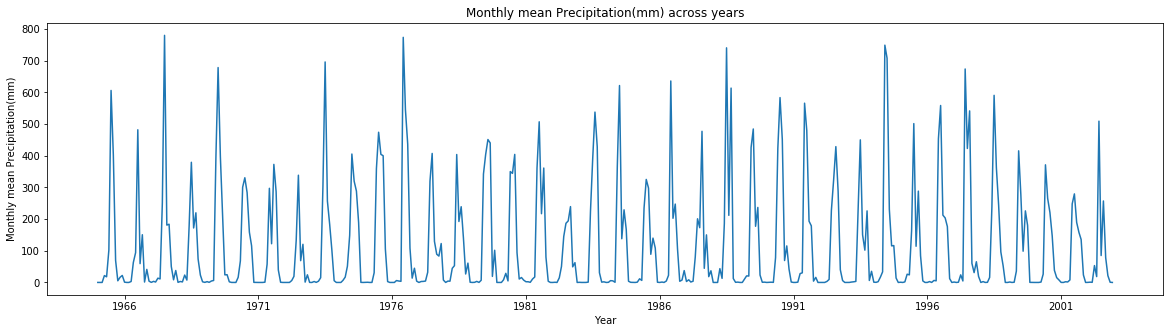

In [19]:
plt.figure(figsize=(20,5))
plt.plot(rainfall_data)
plt.xlabel('Year')
plt.ylabel('Monthly mean Precipitation(mm)')
plt.title('Monthly mean Precipitation(mm) across years')

Text(0.5,1,'Monthly mean Precipitation(mm) across 5  years')

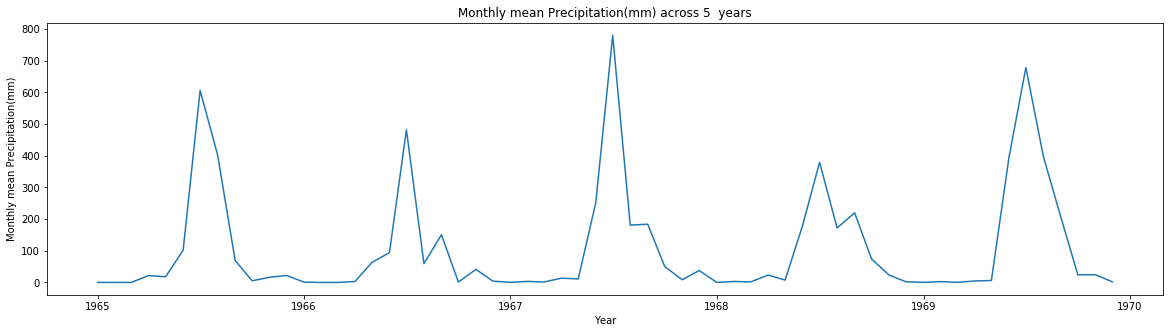

In [20]:
plt.figure(figsize=(20,5))
plt.plot(rainfall_data[:60])
plt.xlabel('Year')
plt.ylabel('Monthly mean Precipitation(mm)')
plt.title('Monthly mean Precipitation(mm) across 5  years')

In [21]:
test_rainfall_data = rainfall_data.ix['1995': '2002']
train_rainfall_data =rainfall_data.ix[: '1994']
train_rainfall_data.tail()

C:\Users\Sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,Precipitation
1994-08-01,230.898
1994-09-01,115.509
1994-10-01,116.348
1994-11-01,14.098
1994-12-01,0.000


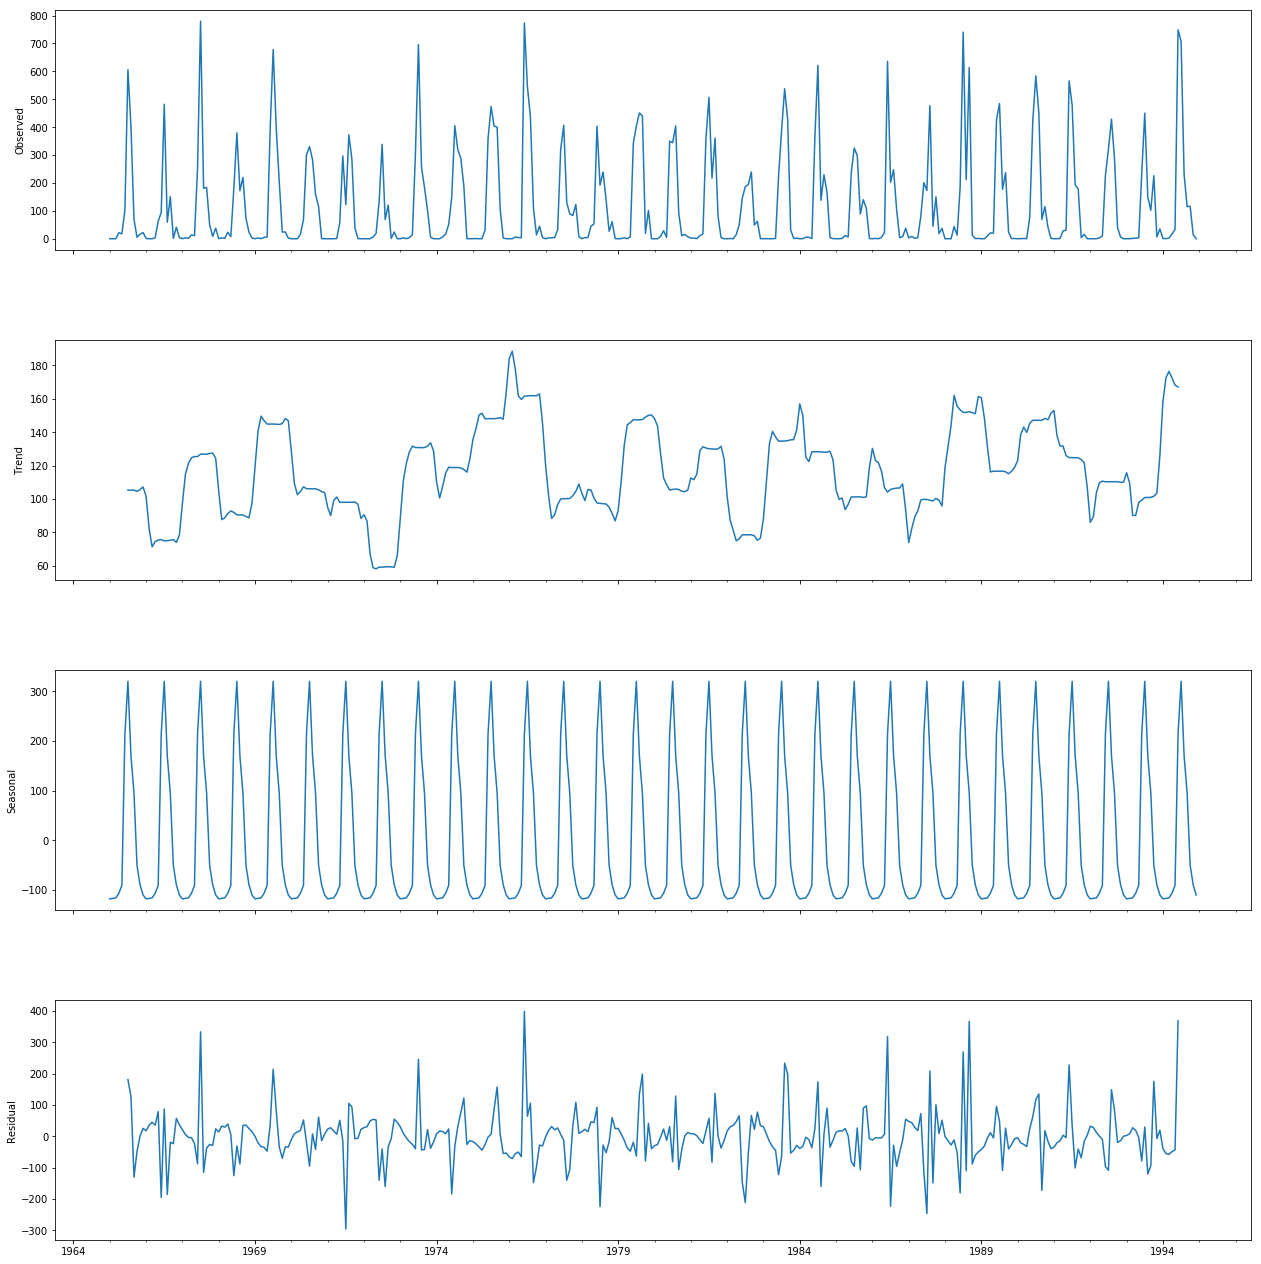

In [22]:
decomposition=sm.tsa.seasonal_decompose(train_rainfall_data,model='additive')
fig=decomposition.plot()
fig.set_figwidth(20)
fig.set_figheight(20)

In [23]:
def check_stationarity(train_rainfall_data):
    train_rainfall_data.plot(figsize=(10,10))
    train_rainfall_data.hist(bins=30)
    X=train_rainfall_data.values
    split=int(len(X)/2)
    X1,X2=X[0:split],X[split:]
    mean1,mean2=X1.mean(),X2.mean()
    var1,var2=X1.var(),X2.var()
    print("Mean1-->{},Mean2-->{}".format(mean1,mean2))
    print("Var1-->{},Var2-->{}".format(var1,var2))        

Mean1-->114.03276111111111,Mean2-->120.10449444444446
Var1-->29343.168233370707,Var2-->32111.812908094416


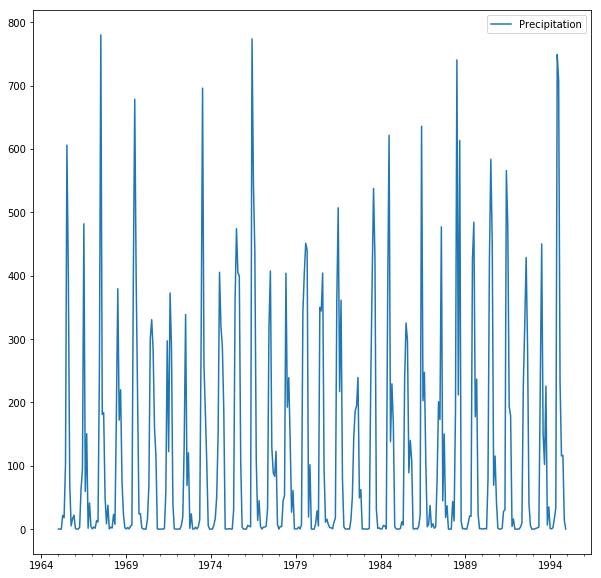

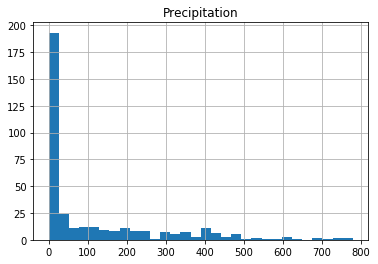

In [24]:
check_stationarity(train_rainfall_data)

In [25]:
print('Results of Dickey Fuller Test:\n')
dftest = adfuller(train_rainfall_data['Precipitation'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'No. of Lags used', 'Number of observations used'])
for key,value in dftest[4].items():
    dfoutput[key] = value
print(dfoutput)
if dfoutput[key]<0.05:
    print('Time Series is  stationary')
else:
    print('Time Series is not stationary')

Results of Dickey Fuller Test:

Test Statistic                  -4.258992
p-value                          0.000523
No. of Lags used                11.000000
Number of observations used    348.000000
1%                              -3.449282
5%                              -2.869881
10%                             -2.571214
dtype: float64
Time Series is  stationary


#### As time series is stationary there is no need for difference

Text(0.5,1,'6 Months Moving Average')

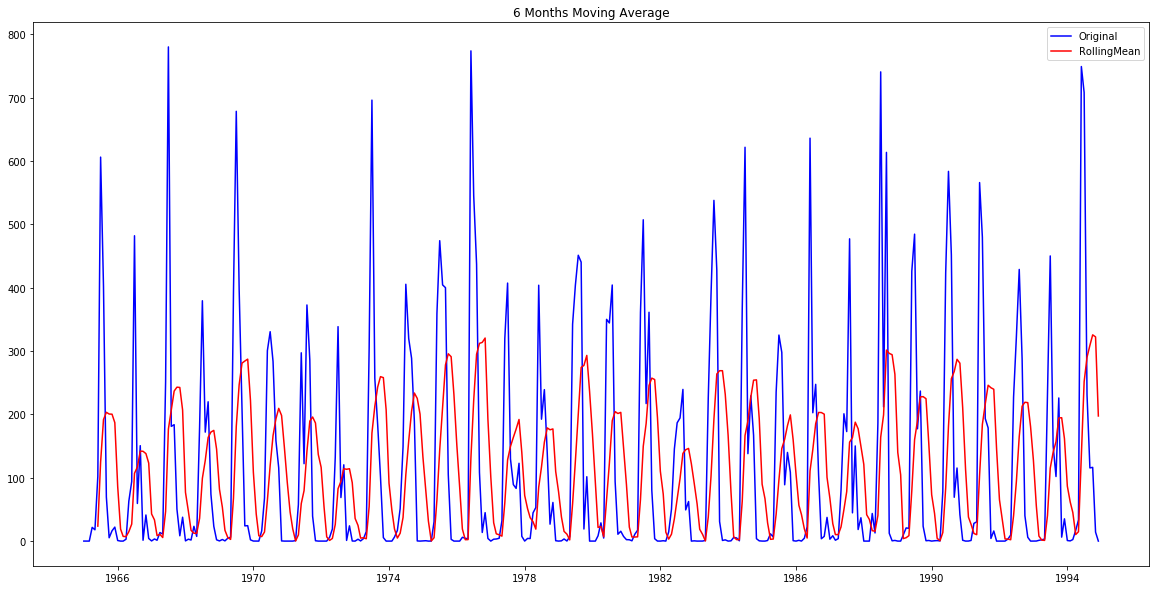

In [26]:
plt.figure(figsize=(20,10))
six_month_ma=train_rainfall_data.rolling(window=6).mean()
plt.plot(train_rainfall_data,color='blue',label='Original')
plt.plot(six_month_ma,color='red',label='RollingMean')
plt.legend(loc='best')
plt.title('6 Months Moving Average')

Text(0.5,1,'12 Months Moving Average')

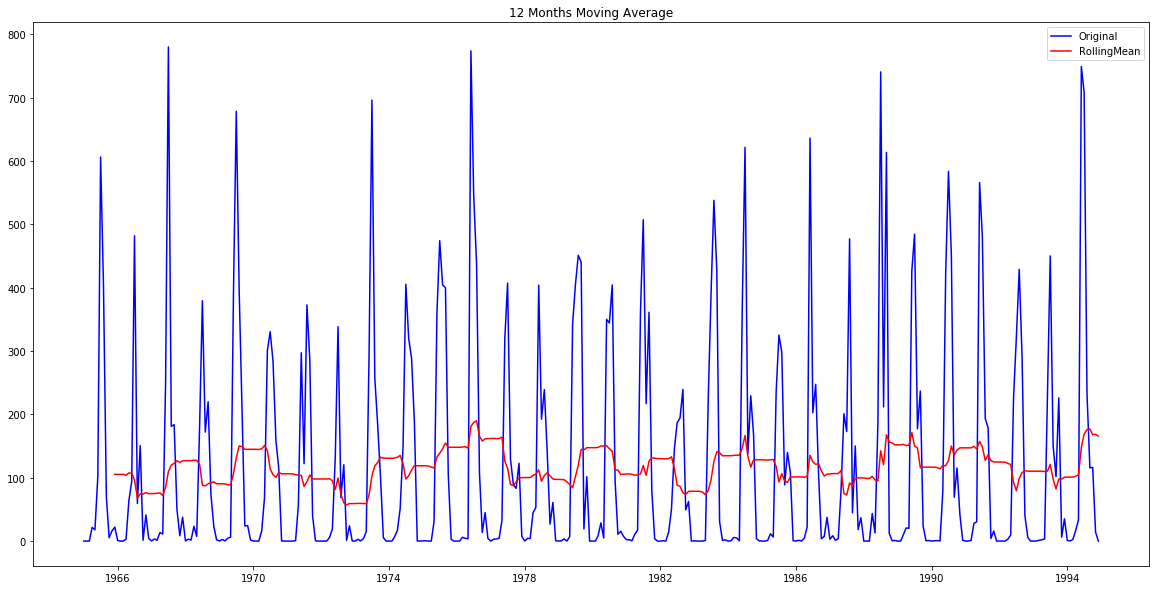

In [27]:
plt.figure(figsize=(20,10))
twelve_month_ma=train_rainfall_data.rolling(window=12).mean()
plt.plot(train_rainfall_data,color='blue',label='Original')
plt.plot(twelve_month_ma,color='red',label='RollingMean')
plt.legend(loc='best')
plt.title('12 Months Moving Average')

### Analysis
- As we could see in the above plots, 12-month moving average could produce a wrinkle free curve when compared to other moving averages.
- Therefore, s=12.

- This is to find the period of seasonality.

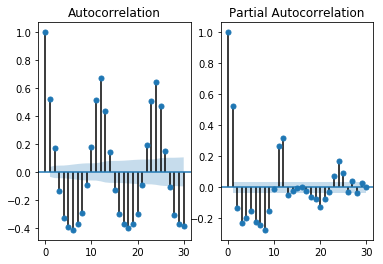

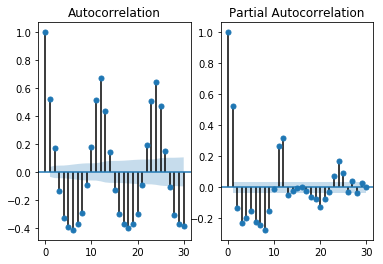

In [28]:
fig,axes=plt.subplots(1,2)
smt.graphics.plot_acf(train_rainfall_data,lags=30,ax=axes[0],alpha=0.5)
smt.graphics.plot_pacf(train_rainfall_data,lags=30,ax=axes[1],alpha=0.5)

#### Since there is seasonality effect we need to apply difference

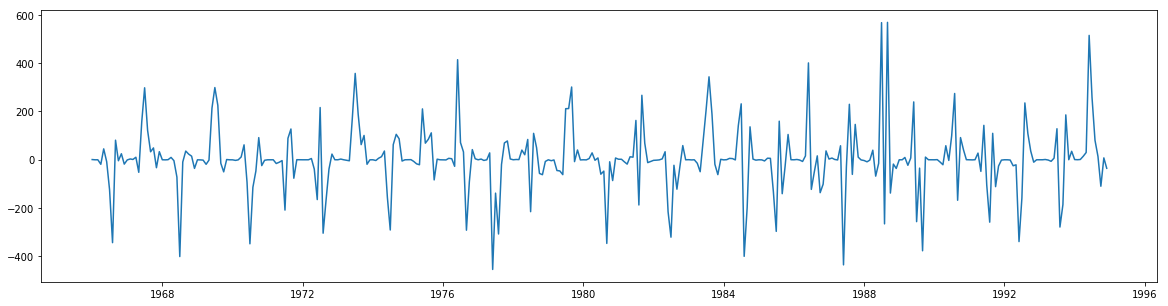

In [29]:
diff_12=train_rainfall_data.diff(periods=12)
diff_12.dropna(inplace=True)
plt.figure(figsize=(20,5))
plt.plot(diff_12)

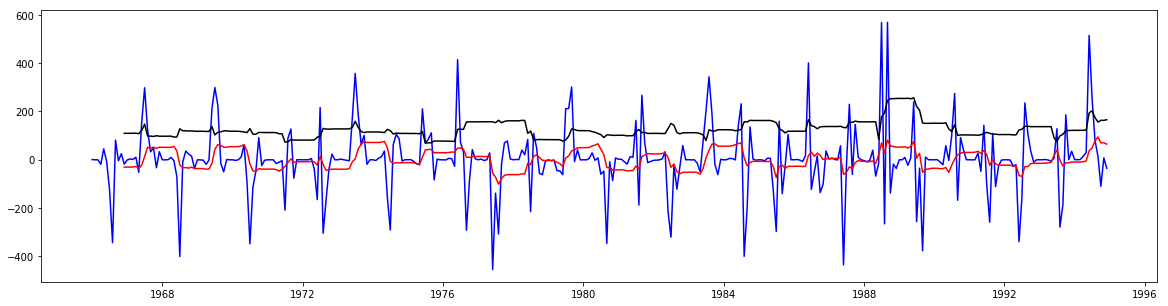

In [30]:
ma=diff_12.rolling(window=12).mean()
plt.figure(figsize=(20,5))
plt.plot(diff_12,color='blue')
plt.plot(ma,color='red')
plt.plot(diff_12.rolling(window=12).std(),color='black')

In [31]:
print('Results of Dickey Fuller Test after sesonality removal:\n')
dftest = adfuller(diff_12['Precipitation'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'No. of Lags used', 'Number of observations used'])
print(dfoutput)

Results of Dickey Fuller Test after sesonality removal:

Test Statistic                -8.550885e+00
p-value                        9.230261e-14
No. of Lags used               1.200000e+01
Number of observations used    3.350000e+02
dtype: float64


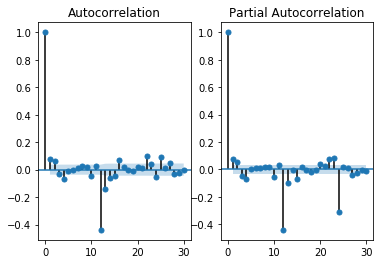

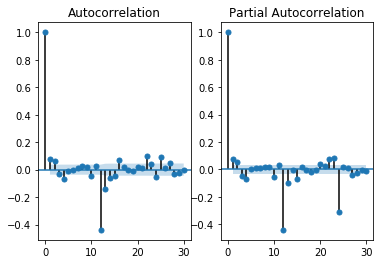

In [32]:
fig,axes=plt.subplots(1,2)
smt.graphics.plot_acf(diff_12,lags=30,ax=axes[0],alpha=0.5)
smt.graphics.plot_pacf(diff_12,lags=30,ax=axes[1],alpha=0.5)

In [33]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [34]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None
AIC_scores_list=[]

for param in pdq:
    for param_seasonal in seasonal_pdq:        
        try:
            
            temp_model = sm.tsa.statespace.SARIMAX(train_rainfall_data,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit()
            l = []
            l.append(param[0])
            l.append(param[1])
            l.append(param[2])
            l.append(param_seasonal[0])
            l.append(param_seasonal[1])
            l.append(param_seasonal[2])
            l.append(param_seasonal[3])
            l.append(results.aic)
            AIC_scores_list.append(l)
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue

print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

C:\Users\Sachin\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Best SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 model - AIC:4182.508209624637


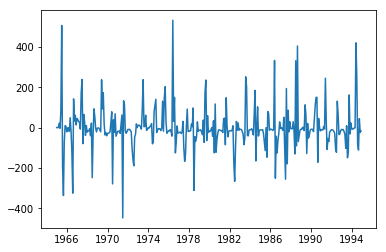

In [36]:
plt.plot(results.resid)

In [37]:
from statsmodels.stats.stattools import jarque_bera

score, pvalue, _, _ = jarque_bera(results.resid)
print(score, pvalue)
if pvalue < 0.10:
    print ('The residuals may not be normally distributed.')
else:
    print ('The residuals seem normally distributed.')

664.8641330241161 4.2324116985e-145
The residuals may not be normally distributed.


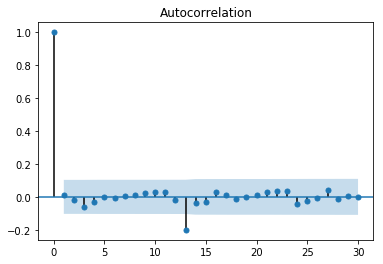

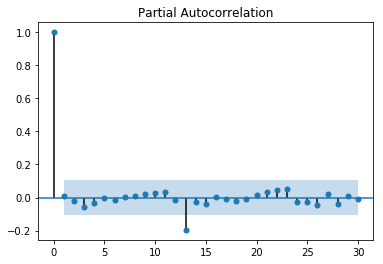

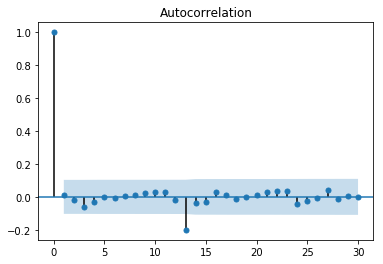

In [38]:
plot_pacf(results.resid,lags=30)
plot_acf(results.resid,lags=30)

In [39]:
best_pdq,best_seasonal_pdq

((0, 1, 1), (0, 1, 1, 12))

In [40]:
best_model = sm.tsa.statespace.SARIMAX(train_rainfall_data,
                                      order=best_pdq,
                                      seasonal_order=best_seasonal_pdq,
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
best_results = best_model.fit()

In [41]:
best_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                      Precipitation   No. Observations:                  360
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2088.254
Date:                            Mon, 19 Nov 2018   AIC                           4182.508
Time:                                    20:50:43   BIC                           4194.167
Sample:                                01-01-1965   HQIC                          4187.144
                                     - 12-01-1994                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9995      0.504     -1.985      0.047      -1.987      -0.012
ma.S.L12      -0.9610      0.037    -26.307      0.000      -1.033      -0.889
sigma2      8828.8580   4433.645      1.991      0.046     139.074    1.75e+04
===================================================================================
Ljung-Box (Q):                       32.23   Jarque-Bera (JB):               619.00
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.60   Skew:                             0.97
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
predictions=best_results.get_prediction(start=pd.to_datetime('1990-01-01'),end=pd.to_datetime('2002-12-01'))
mean_predictions=predictions.predicted_mean

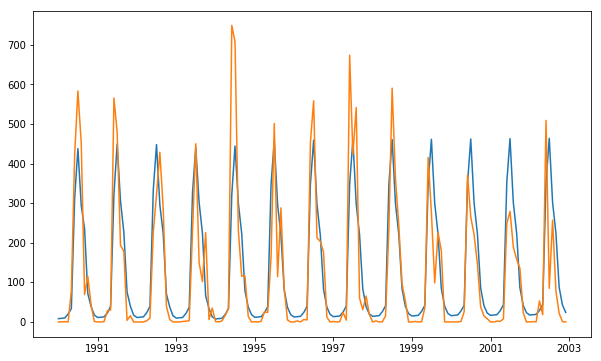

In [43]:
plt.figure(figsize=(10,6))
plt.plot(predictions.predicted_mean)
#plt.plot(test_rainfall_data['1990':])
plt.plot(rainfall_data['1990':])

In [44]:
actual= rainfall_data['1990':].Precipitation

In [45]:
mse = math.sqrt(((mean_predictions - actual) ** 2).mean())
print('The Mean Squared Error of our predictions is {}'.format(round(mse, 4)))

The Mean Squared Error of our predictions is 92.5581


# Forcast for next 7 years

In [46]:
n_steps = 108
pred_uc_95 = best_results.get_forecast(steps=n_steps, alpha=0.05) # alpha=0.05 95% CI
pred_ci_95 = pred_uc_95.conf_int()

In [49]:
index = pd.date_range(start=pd.to_datetime('1995-01-01'), periods=n_steps, freq='MS')
forecast_data = pd.DataFrame(np.column_stack([pred_uc_95.predicted_mean, pred_ci_95]), 
                     index=index, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])

forecast_data.tail()

,forecast,lower_ci_95,upper_ci_95
2003-08-01,302.856494,115.131650,490.581337
2003-09-01,225.265906,37.541026,412.990786
2003-10-01,88.308779,-99.416138,276.033696
2003-11-01,43.411404,-144.313555,231.136362
2003-12-01,25.062431,-162.662580,212.787441


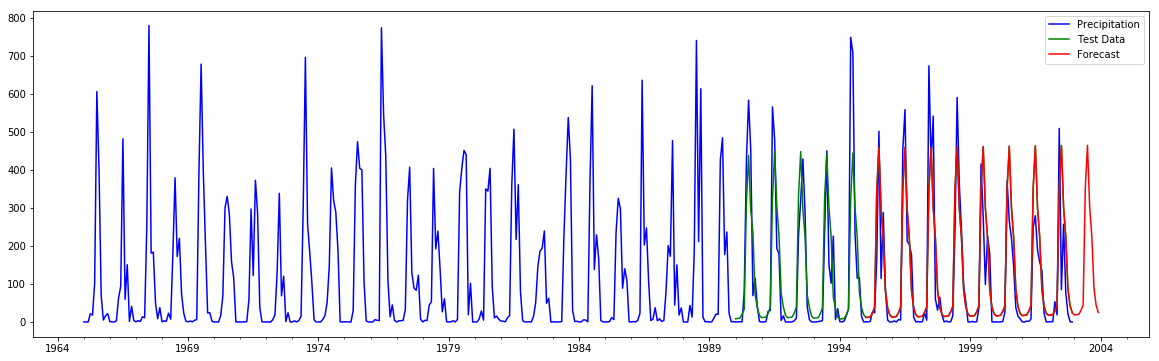

In [50]:
#plt.Figure(figsize=(20,6))
rainfall_data.plot(label='Observed',color='blue',figsize=(20,6))
predictions.predicted_mean.plot(label='Test Data',color='green',figsize=(20,6))
forecast_data['forecast'].plot(label='Forecast',color='red',figsize=(20,6))
plt.legend(loc='best')

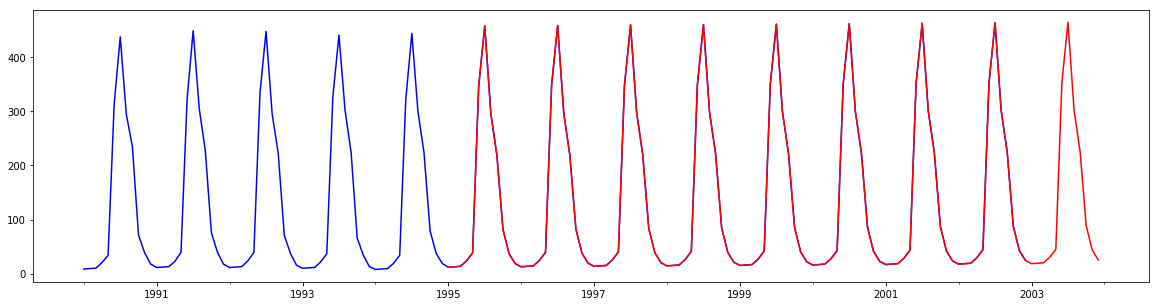

In [51]:
predictions.predicted_mean.plot(label='test data',figsize=(20,5),color='blue')
forecast_data['forecast'].plot(label='Forecast',figsize=(20,5),color='red')

In [52]:
np.mean(np.abs((actual['1995-01-01':'2002-12-01']-forecast_data['forecast']['1995-01-01':'2002-12-01'])))

56.04289442999424

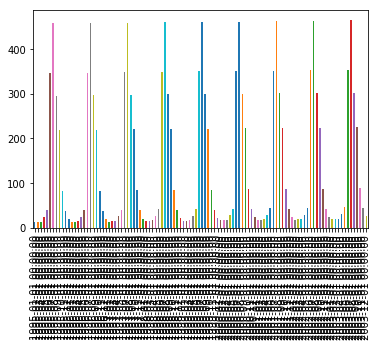

In [67]:
forecast_data['forecast'].plot(kind='bar')

In [54]:
rainfall_data.index

DatetimeIndex(['1965-01-01', '1965-02-01', '1965-03-01', '1965-04-01',
               '1965-05-01', '1965-06-01', '1965-07-01', '1965-08-01',
               '1965-09-01', '1965-10-01',
               ...
               '2002-03-01', '2002-04-01', '2002-05-01', '2002-06-01',
               '2002-07-01', '2002-08-01', '2002-09-01', '2002-10-01',
               '2002-11-01', '2002-12-01'],
              dtype='datetime64[ns]', length=456, freq='MS')

In [75]:
forecasted_data=forecast_data['forecast']['2003-01-01':]

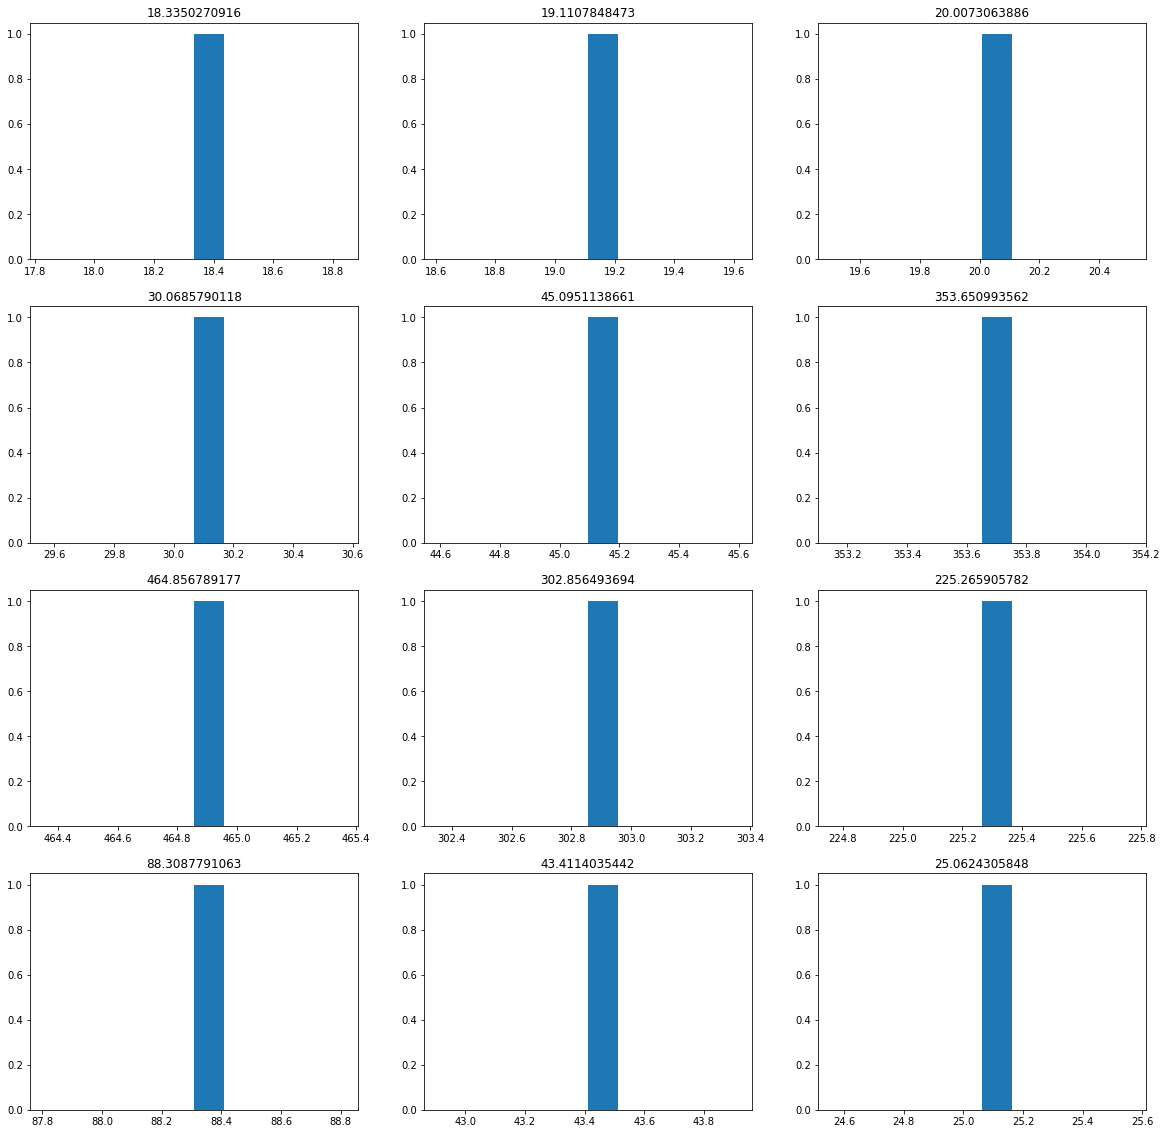

In [76]:
plt.figure(figsize=(20,20))
for pos in range(0,12):
    plt.subplot(4,3,pos+1)
    plt.hist(forecasted_data[pos])
   # plt.xticks(np.array(range(num_years)), [i for i in range(2014,2014+num_years)])
    plt.title(forecasted_data[pos])

plt.show()